# Final Prep for States Data

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Parameters

In [2]:
STATE_POP_DEN_DATASET = "../../../data/RQ3/processed/state_pop_den_df.csv"
STATE_DIABETES_DEATH_DATASET = "../../../data/RQ3/processed/state_diabetes_death_df.csv"
VIOLENT_CRIME_STATE_DATASET = "../../../data/RQ3/processed/violent_crime_by_state_df.csv"

STATES_FINAL_DATASET = "../../../data/RQ3/processed/states_final_df.csv"

## Configuration

In [3]:
%matplotlib inline

# Loading the Datasets

In [4]:
state_pop_den_df = pd.read_csv(STATE_POP_DEN_DATASET)
state_diabetes_death_df = pd.read_csv(STATE_DIABETES_DEATH_DATASET)
violent_crime_by_state_df = pd.read_csv(VIOLENT_CRIME_STATE_DATASET)


In [5]:
state_pop_den_df.head()

,State,Population Density
0,ALABAMA,96.508029
1,ALASKA,1.288269
2,ARIZONA,63.014058
3,ARKANSAS,57.840016
4,CALIFORNIA,253.317407


In [6]:
state_diabetes_death_df.head()

,State,Diabetes Deaths
0,ALABAMA,1423
1,ALASKA,131
2,ARIZONA,1705
3,ARKANSAS,867
4,CALIFORNIA,7012


In [7]:
violent_crime_by_state_df.head()

,State,Population,Violent Crime,Violence Deaths
0,ALABAMA,4887871,25399,383
1,ALASKA,737438,6526,47
2,ARIZONA,7171646,34058,369
3,ARKANSAS,3013825,16384,216
4,CALIFORNIA,39557045,176982,1739


In [8]:
bviolent_crime_by_state_df = violent_crime_by_state_df.drop(['Violent Crime'], axis=1)
violent_crime_by_state_df.head()

,State,Population,Violent Crime,Violence Deaths
0,ALABAMA,4887871,25399,383
1,ALASKA,737438,6526,47
2,ARIZONA,7171646,34058,369
3,ARKANSAS,3013825,16384,216
4,CALIFORNIA,39557045,176982,1739


In [9]:
df = state_pop_den_df.merge(state_diabetes_death_df, on='State', how='left')
df

,State,Population Density,Diabetes Deaths
0,ALABAMA,96.508029,1423
1,ALASKA,1.288269,131
2,ARIZONA,63.014058,1705
3,ARKANSAS,57.840016,867
4,CALIFORNIA,253.317407,7012
5,COLORADO,54.912999,856
6,CONNECTICUT,737.557720,710
7,DELAWARE,495.488417,242
8,DISTRICT OF COLUMBIA,11491.351351,150
9,FLORIDA,396.166193,5556


In [10]:
df2 = df.merge(violent_crime_by_state_df, on='State', how='left')
df2.head()

,State,Population Density,Diabetes Deaths,Population,Violent Crime,Violence Deaths
0,ALABAMA,96.508029,1423,4887871,25399,383
1,ALASKA,1.288269,131,737438,6526,47
2,ARIZONA,63.014058,1705,7171646,34058,369
3,ARKANSAS,57.840016,867,3013825,16384,216
4,CALIFORNIA,253.317407,7012,39557045,176982,1739


In [11]:
df2 = df2[['State', 'Population', 'Population Density', 'Diabetes Deaths', 'Violence Deaths']]
df2.head()

,State,Population,Population Density,Diabetes Deaths,Violence Deaths
0,ALABAMA,4887871,96.508029,1423,383
1,ALASKA,737438,1.288269,131,47
2,ARIZONA,7171646,63.014058,1705,369
3,ARKANSAS,3013825,57.840016,867,216
4,CALIFORNIA,39557045,253.317407,7012,1739


In [12]:
df2['Diabetes Death per Pop'] = df2['Diabetes Deaths'] / df2['Population']
df2['Violence Death per Pop'] = df2['Violence Deaths'] / df2['Population']
df2.head(10)

,State,Population,Population Density,Diabetes Deaths,Violence Deaths,Diabetes Death per Pop,Violence Death per Pop
0,ALABAMA,4887871,96.508029,1423,383,0.000291,0.000078
1,ALASKA,737438,1.288269,131,47,0.000178,0.000064
2,ARIZONA,7171646,63.014058,1705,369,0.000238,0.000051
3,ARKANSAS,3013825,57.840016,867,216,0.000288,0.000072
4,CALIFORNIA,39557045,253.317407,7012,1739,0.000177,0.000044
5,COLORADO,5695564,54.912999,856,210,0.000150,0.000037
6,CONNECTICUT,3572665,737.557720,710,83,0.000199,0.000023
7,DELAWARE,967171,495.488417,242,48,0.000250,0.000050
8,DISTRICT OF COLUMBIA,702455,11491.351351,150,160,0.000214,0.000228
9,FLORIDA,21299325,396.166193,5556,1107,0.000261,0.000052


In [13]:
#To take away district of columbia as outlier
temp_df = df2.copy()
temp_df = temp_df.drop(8)

No handles with labels found to put in legend.


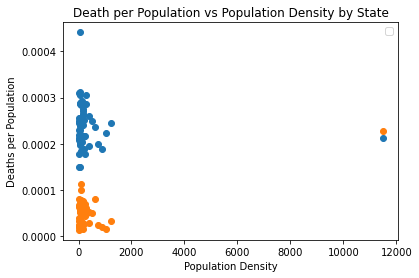

In [14]:
fig, ax = plt.subplots()
plt.scatter(df2['Population Density'], df2['Diabetes Death per Pop'])
plt.scatter(df2['Population Density'], df2['Violence Death per Pop'])
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density") 
plt.ylabel("Deaths per Population")
plt.legend()
plt.show()

No handles with labels found to put in legend.


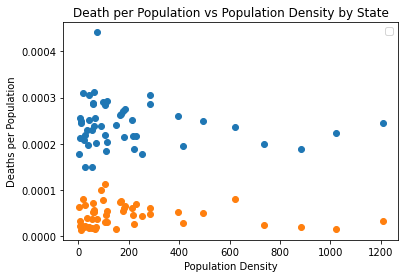

In [15]:
#Graph with District of Columbia excluded

fig, ax = plt.subplots()
plt.scatter(temp_df['Population Density'], temp_df['Diabetes Death per Pop'])
plt.scatter(temp_df['Population Density'], temp_df['Violence Death per Pop'])
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density")
plt.ylabel("Deaths per Population")
plt.legend()
plt.show()

In [16]:
df2['Violence Death per Pop'].corr(df2['Diabetes Death per Pop'])

0.11521086317208402

# Saving the Dataset

In [17]:
states_final_df = df2.copy()
states_final_df.to_csv(STATES_FINAL_DATASET, index=False)